<h1>Predicting apartment prices with machine learning</h1>

<p>This project aims to predict fair rental prices for real estate in São Paulo through known data such as the number of rooms, size, and region, for example.<p/>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Is necessary a token in mapbox.com

px.set_mapbox_access_token(open("mapbox_token.txt").read())

<h4>there are other data analysis repositories where I recorded learning about these libraries</h4>
    </br>
<a href="https://github.com/JeffersonLobato/Analisando-dados-com-Pandas-e-SQL">Resitory of Data Analysis</a>
|
<a href="https://github.com/JeffersonLobato/Curso-Visualizando-Dados-com-Matplotlib-e-Seaborn">Repository of Matplotlib and Searborn</a>

<h2>Viwing the datas</h2>

In [3]:
df_data = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [4]:
df_data.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

In [5]:
#Analising the datas we realized that Negotiation Type diferents, so we separet only "rent"

df_rent = df_data[df_data["Negotiation Type"]=="rent"]

In [6]:
df_rent.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

In [7]:
#The center of map

lat = df_rent['Latitude'].median()
lon = df_rent['Longitude'].median()
center = {'lat': lat, 'lon': lon}
center

{'lat': -23.55586865, 'lon': -46.64479335}

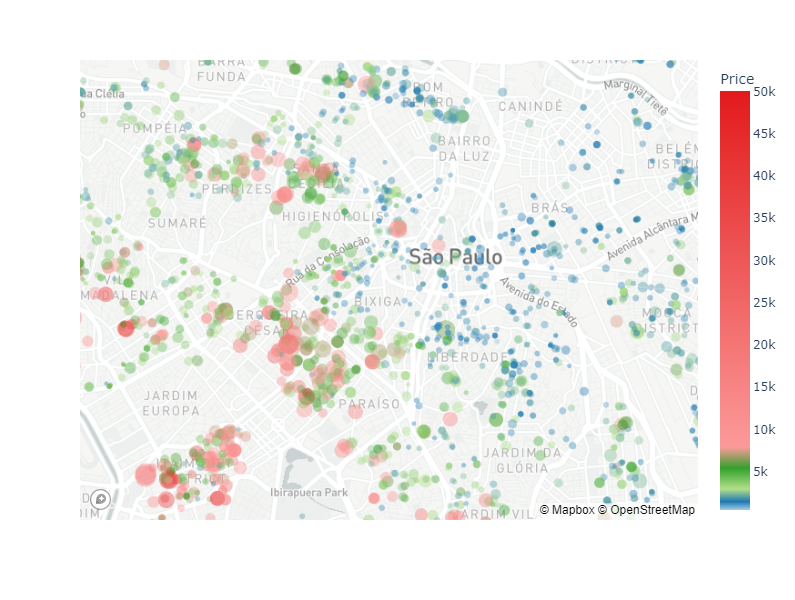

In [8]:
#Viewing the datas on the map
#Is necessary a token of mapbox.com

fig = px.scatter_mapbox(df_rent, lat="Latitude", lon="Longitude", color="Price", size="Size",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=20, zoom=12, center=center, opacity=0.4)

fig.update_coloraxes(colorscale= [[0, 'rgb(166, 206, 227, 0.5)'],
                                  [0.02, 'rgb(31, 120, 180, 0.5)'],
                                  [0.05, 'rgb(178, 223, 138, 0.5)'],
                                  [0.10, 'rgb(51, 160, 44, 0.5)'],
                                  [0.15, 'rgb(251, 154, 153, 0.5)'],
                                  [1, 'rgb(227, 26, 28, 0.5)']
                                 ],
                    )

fig.update_layout(width=800, height=600)

<h2>Analyzing the data</h2>

In [9]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memor

In [10]:
df_rent.describe()

Price        Condo         Size        Rooms      Toilets  \
count   7228.000000  7228.000000  7228.000000  7228.000000  7228.000000   
mean    3077.669065   825.194798    89.486165     2.304234     2.105562   
std     3522.830284   835.621937    63.976416     0.829108     0.998162   
min      480.000000     0.000000    30.000000     1.000000     1.000000   
25%     1350.000000   395.750000    52.000000     2.000000     2.000000   
50%     2000.000000   595.000000    67.000000     2.000000     2.000000   
75%     3300.000000   990.000000   100.000000     3.000000     2.000000   
max    50000.000000  9500.000000   880.000000    10.000000     8.000000   

            Suites      Parking     Elevator    Furnished  Swimming Pool  \
count  7228.000000  7228.000000  7228.000000  7228.000000    7228.000000   
mean      1.024488     1.452269     0.299806     0.172939       0.487963   
std       0.884241     0.889535     0.458205     0.378220       0.499890   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000     1.000000     0.000000     0.000000       0.000000   
50%       1.000000     1.000000     0.000000     0.000000       0.000000   
75%       1.000000     2.000000     1.000000     0.000000       1.000000   
max       5.000000     9.000000     1.000000     1.000000       1.000000   

               New     Latitude    Longitude  
count  7228.000000  7228.000000  7228.000000  
mean      0.000830   -22.032278   -43.500873  
std       0.028802     5.962534    11.675070  
min       0.000000   -46.749039   -58.364352  
25%       0.000000   -23.598066   -46.689788  
50%       0.000000   -23.555869   -46.644793  
75%       0.000000   -23.522756   -46.585110  
max       1.000000     0.000000     0.000000

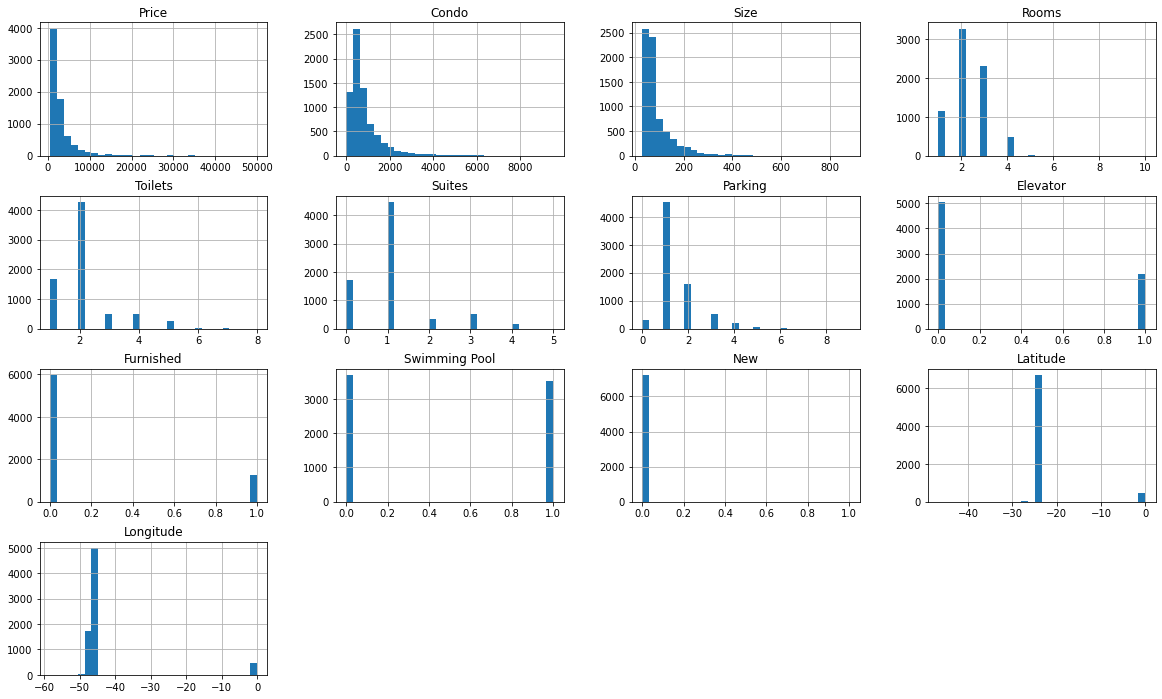

In [26]:
df_rent.hist(bins=30, figsize=(20, 12));

In [27]:
df_rent['Property Type'].value_counts()

apartment    7228
Name: Property Type, dtype: int64

In [28]:
df_rent['Negotiation Type'].value_counts()

rent    7228
Name: Negotiation Type, dtype: int64

In [29]:
df_rent['District'].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

<h4>So far we have found that some columns provide a common data across all rows, and these columns may not be necessary for our model as they do not show any variation. Now let's check the correlation between the variables.</h4>

<p>The corr() function in pandas is used to calculate the correlation between columns of a DataFrame. Correlation is a statistical measure that indicates the degree of relationship between two variables, which can be positive, negative, or neutral. When two variables have a positive correlation, it means that they have a direct relationship, i.e., when one increases, the other also increases. On the other hand, a negative correlation indicates an inverse relationship, i.e., when one increases, the other decreases. The corr() function returns a correlation matrix with values ranging from -1 to 1 for each pair of columns in the DataFrame.</p>

In [30]:
df_rent.corr()

Price     Condo      Size     Rooms   Toilets    Suites  \
Price          1.000000  0.700361  0.731795  0.390951  0.583488  0.588329   
Condo          0.700361  1.000000  0.812374  0.494153  0.596520  0.597069   
Size           0.731795  0.812374  1.000000  0.673232  0.694294  0.701954   
Rooms          0.390951  0.494153  0.673232  1.000000  0.557247  0.545859   
Toilets        0.583488  0.596520  0.694294  0.557247  1.000000  0.920932   
Suites         0.588329  0.597069  0.701954  0.545859  0.920932  1.000000   
Parking        0.640743  0.703888  0.752954  0.592387  0.703447  0.718788   
Elevator       0.031860  0.020271  0.006993  0.000993  0.143176  0.106189   
Furnished      0.171859  0.075928  0.005886 -0.104705  0.068190  0.068014   
Swimming Pool  0.206884  0.198613  0.148408  0.151225  0.262526  0.267219   
New           -0.008477 -0.011678 -0.017416 -0.022166 -0.007862 -0.006231   
Latitude      -0.036935 -0.045458 -0.043168 -0.050753 -0.128304 -0.130413   
Longitude     -0.038362 -0.048381 -0.046238 -0.052897 -0.129482 -0.131519   

                Parking  Elevator  Furnished  Swimming Pool       New  \
Price          0.640743  0.031860   0.171859       0.206884 -0.008477   
Condo          0.703888  0.020271   0.075928       0.198613 -0.011678   
Size           0.752954  0.006993   0.005886       0.148408 -0.017416   
Rooms          0.592387  0.000993  -0.104705       0.151225 -0.022166   
Toilets        0.703447  0.143176   0.068190       0.262526 -0.007862   
Suites         0.718788  0.106189   0.068014       0.267219 -0.006231   
Parking        1.000000  0.027476   0.066077       0.304904  0.001547   
Elevator       0.027476  1.000000   0.095207       0.150773  0.044049   
Furnished      0.066077  0.095207   1.000000       0.185192  0.012224   
Swimming Pool  0.304904  0.150773   0.185192       1.000000  0.019915   
New            0.001547  0.044049   0.012224       0.019915  1.000000   
Latitude      -0.054828 -0.117160  -0.022449      -0.025033  0.030711   
Longitude     -0.057929 -0.108175  -0.018386      -0.020293  0.030722   

               Latitude  Longitude  
Price         -0.036935  -0.038362  
Condo         -0.045458  -0.048381  
Size          -0.043168  -0.046238  
Rooms         -0.050753  -0.052897  
Toilets       -0.128304  -0.129482  
Suites        -0.130413  -0.131519  
Parking       -0.054828  -0.057929  
Elevator      -0.117160  -0.108175  
Furnished     -0.022449  -0.018386  
Swimming Pool -0.025033  -0.020293  
New            0.030711   0.030722  
Latitude       1.000000   0.976032  
Longitude      0.976032   1.000000

In [34]:
df_rent.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64